# Project 9: Out-of-Distribution Detection
> Minxue Tang

> Lead TA: Nathan Inkawhich

## Part 1: Implement Baseline and ODIN

In [1]:
import torch
# Baseline and ODIN are implemented in detector.py
from detector import Baseline_Detector, ODIN_Detector
import matplotlib.pyplot as plt
from utils import get_dataset,test_inference
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [2]:
# Load Pretrained model

# DenseNet with Cifar10 as in-distribution
net = torch.load("./models/densenet10.pth")


# WideResNet with Cifar10 as in-distribution
# from wideresnet import Wide_ResNet
# net = Wide_ResNet(28,10,0.0,10)
# net.load_state_dict(torch.load("./models/wideresnet10.pt"))
# net.to(device)

# ResNet20 with Cifar10 as in-distribution
# import resnet20
# net = resnet20.ResNetCIFAR(num_layers=20)
# net.load_state_dict(torch.load("./models/resnet20.pt"))
# net.to(device)

# Load in-distribution dataset
InDataLoader = get_dataset('cifar10',64,4)
acc,loss = test_inference(net,InDataLoader,device)
print("In-Distribution Accuracy: %f"%acc)

C:\Users\MahoshiYoruko\anaconda3\lib\site-packages\torch\serialization.py:656: SourceChangeWarning: source code of class 'densenet.DenseNet3' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\MahoshiYoruko\anaconda3\lib\site-packages\torch\serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\MahoshiYoruko\anaconda3\lib\site-packages\torch\serialization.py:656: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's so

## Part 2: Examine Baseline and ODIN with different out-of-distribution datasets
### 1. SVHN

In [3]:
OutDataLoader = get_dataset('SVHN',64,4)
BaseDet = Baseline_Detector(net,InDataLoader,OutDataLoader,device)
ODINDet = ODIN_Detector(net,InDataLoader,OutDataLoader,epsilon=0.004,T=1000,IPP=True,device=device)

Using downloaded and verified file: ./data/SVHN\test_32x32.mat


c:\Study\Duke\ECE590\project\src\metrics.py:35: RuntimeWarning: invalid value encountered in long_scalars
  precission=TP/(TP+FP)


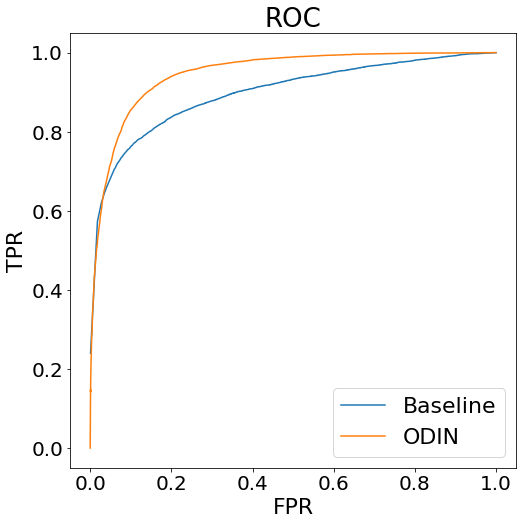

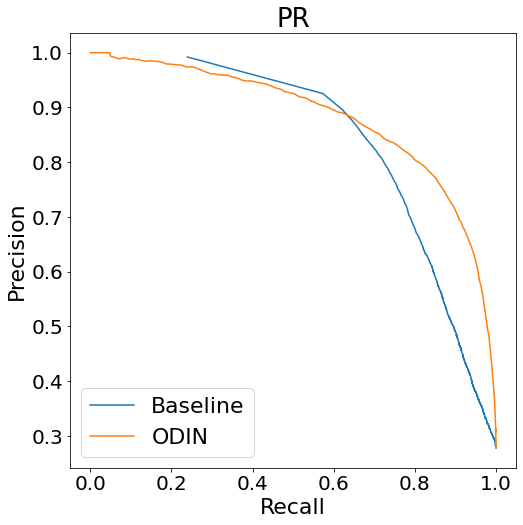

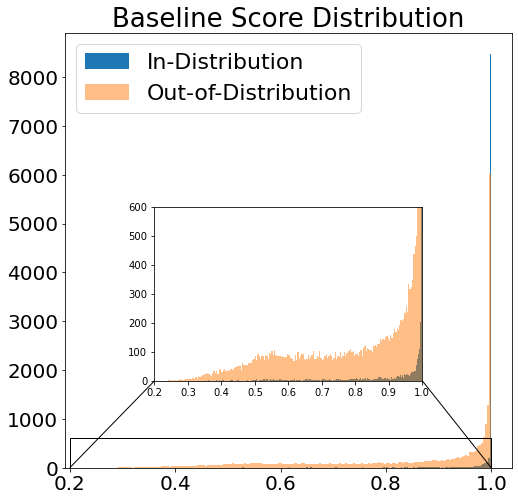

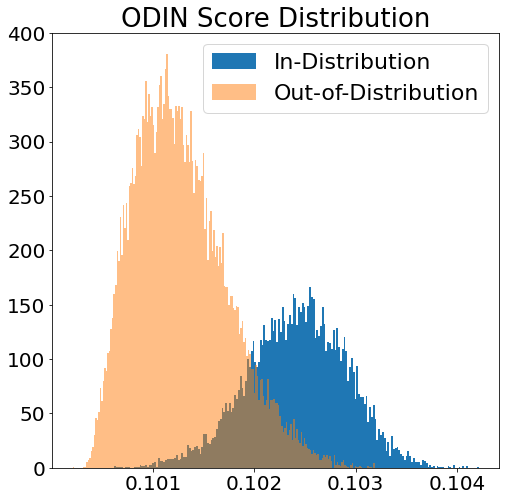

Performance on SVHN:
Baseline	89.8	59.5
ODIN		94.8	22.4


In [8]:
plt.figure(figsize=(8,8))
fig1 = plt.gca()
plt.title("ROC",fontsize=26)
plt.xlabel("FPR",fontsize=22)
plt.ylabel("TPR",fontsize=22)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig2 = plt.gca()
plt.title("PR",fontsize=26)
plt.xlabel("Recall",fontsize=22)
plt.ylabel("Precision",fontsize=22)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig3 = plt.gca()
plt.title("Baseline Score Distribution",fontsize=26)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig4 = plt.gca()
plt.title("ODIN Score Distribution",fontsize=26)
plt.tick_params(labelsize=20)

base_auroc,base_fpr = BaseDet.calculate_metrics()
BaseDet.plot_AUROC(fig1=fig1,fig2=fig2,name=['Baseline','Baseline'])
BaseDet.plot_score_density(fig = fig3)

axin = fig3.inset_axes((0.2, 0.2, 0.6, 0.4))
BaseDet.plot_score_density(fig = axin,legend=False)
axin.set_ylim(0,600)
axin.set_xlim(0.2,1)
mark_inset(fig3, axin, loc1=3, loc2=4, fc="none", ec='k', lw=1)

odin_auroc,odin_fpr = ODINDet.calculate_metrics()
ODINDet.plot_AUROC(fig1=fig1,fig2=fig2,name=['ODIN','ODIN'])
ODINDet.plot_score_density(fig = fig4)
fig1.legend(fontsize=22)
fig2.legend(fontsize=22)

plt.show()
print("Performance on SVHN:")
print("Baseline\t{:.1f}\t{:.1f}".format(base_auroc*100,base_fpr*100))
print("ODIN\t\t{:.1f}\t{:.1f}".format(odin_auroc*100,odin_fpr*100))

### 2. LSUN (crop)

In [9]:
OutDataLoader = get_dataset('LSUN',64,4)
BaseDet = Baseline_Detector(net,InDataLoader,OutDataLoader,device)
ODINDet = ODIN_Detector(net,InDataLoader,OutDataLoader,epsilon=0.0014,T=1000,IPP=True,device=device)

c:\Study\Duke\ECE590\project\src\metrics.py:35: RuntimeWarning: invalid value encountered in long_scalars
  precission=TP/(TP+FP)


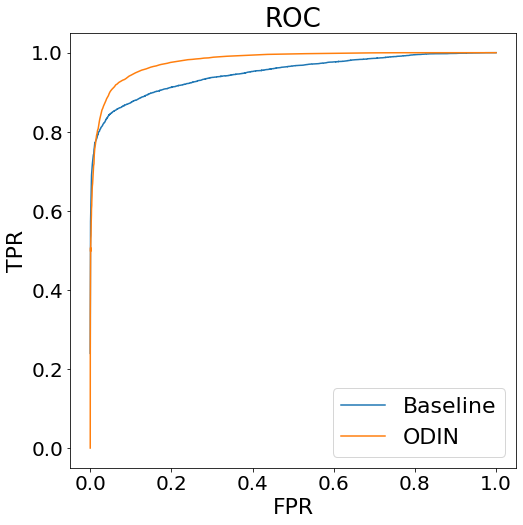

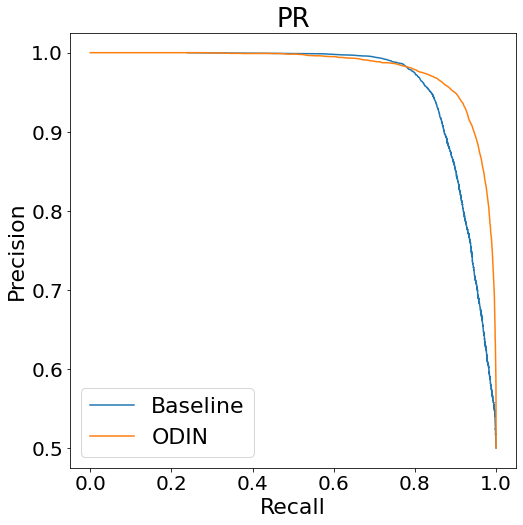

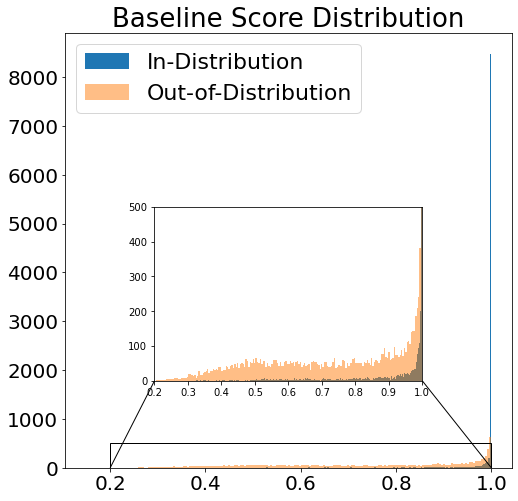

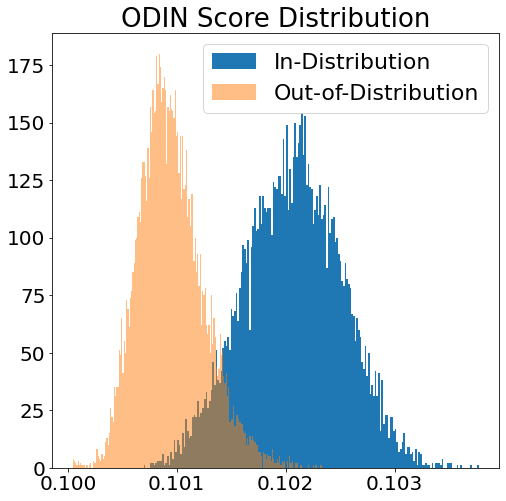

Performance on LSUN (crop):
		AUROC	FPR@95TPR
Baseline	94.9	38.6
ODIN		97.9	11.3


In [10]:
plt.figure(figsize=(8,8))
fig1 = plt.gca()
plt.title("ROC",fontsize=26)
plt.xlabel("FPR",fontsize=22)
plt.ylabel("TPR",fontsize=22)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig2 = plt.gca()
plt.title("PR",fontsize=26)
plt.xlabel("Recall",fontsize=22)
plt.ylabel("Precision",fontsize=22)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig3 = plt.gca()
plt.title("Baseline Score Distribution",fontsize=26)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig4 = plt.gca()
plt.title("ODIN Score Distribution",fontsize=26)
plt.tick_params(labelsize=20)

base_auroc,base_fpr = BaseDet.calculate_metrics()
BaseDet.plot_AUROC(fig1=fig1,fig2=fig2,name=['Baseline','Baseline'])
BaseDet.plot_score_density(fig = fig3)

axin = fig3.inset_axes((0.2, 0.2, 0.6, 0.4))
BaseDet.plot_score_density(fig = axin,legend=False)
axin.set_ylim(0,500)
axin.set_xlim(0.2,1)
mark_inset(fig3, axin, loc1=3, loc2=4, fc="none", ec='k', lw=1)

odin_auroc,odin_fpr = ODINDet.calculate_metrics()
ODINDet.plot_AUROC(fig1=fig1,fig2=fig2,name=['ODIN','ODIN'])
ODINDet.plot_score_density(fig = fig4)
fig1.legend(fontsize=22)
fig2.legend(fontsize=22)

plt.show()
print("Performance on LSUN (crop):")
print("\t\tAUROC\tFPR@95TPR")
print("Baseline\t{:.1f}\t{:.1f}".format(base_auroc*100,base_fpr*100))
print("ODIN\t\t{:.1f}\t{:.1f}".format(odin_auroc*100,odin_fpr*100))

### 3. LSUN (resize)

In [11]:
OutDataLoader = get_dataset('LSUN_resize',64,4)
BaseDet = Baseline_Detector(net,InDataLoader,OutDataLoader,device)
ODINDet = ODIN_Detector(net,InDataLoader,OutDataLoader,epsilon=0.0014,T=1000,IPP=True,device=device)

c:\Study\Duke\ECE590\project\src\metrics.py:35: RuntimeWarning: invalid value encountered in long_scalars
  precission=TP/(TP+FP)


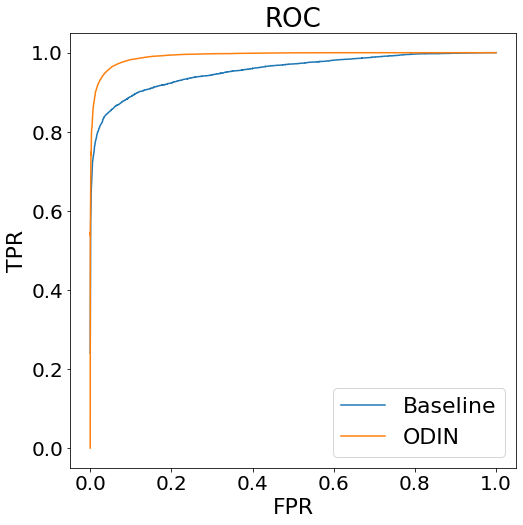

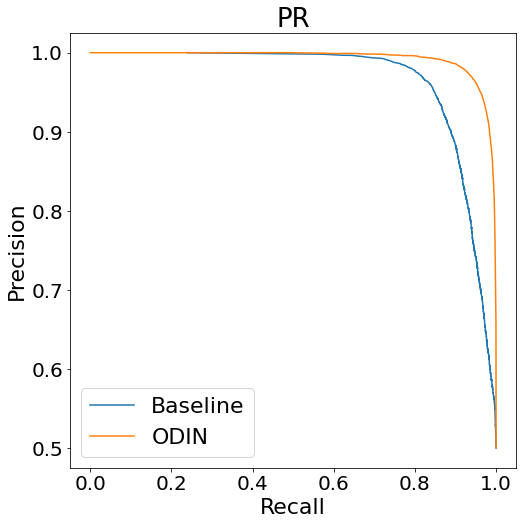

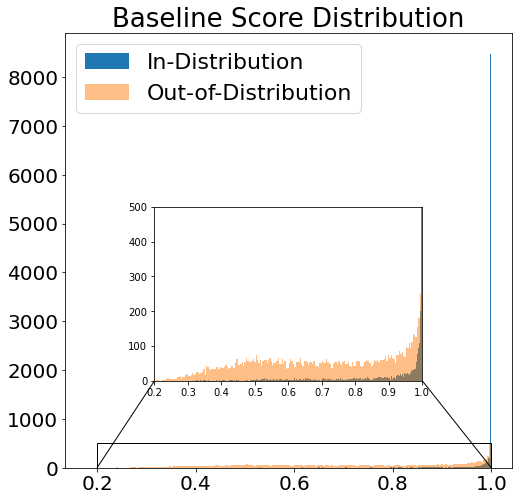

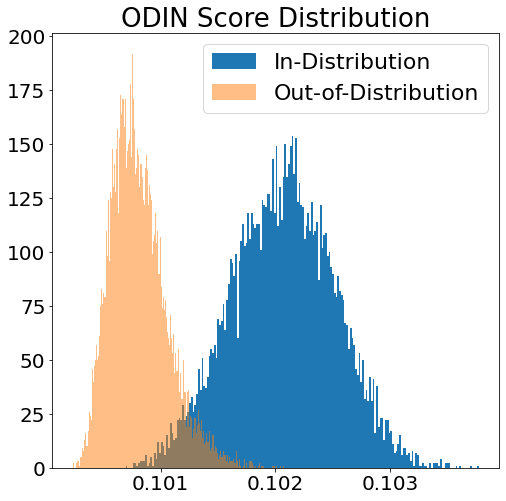

Performance on LSUN (resize):
		AUROC	FPR@95TPR
Baseline	95.5	33.1
ODIN		99.2	3.8


In [12]:
plt.figure(figsize=(8,8))
fig1 = plt.gca()
plt.title("ROC",fontsize=26)
plt.xlabel("FPR",fontsize=22)
plt.ylabel("TPR",fontsize=22)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig2 = plt.gca()
plt.title("PR",fontsize=26)
plt.xlabel("Recall",fontsize=22)
plt.ylabel("Precision",fontsize=22)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig3 = plt.gca()
plt.title("Baseline Score Distribution",fontsize=26)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig4 = plt.gca()
plt.title("ODIN Score Distribution",fontsize=26)
plt.tick_params(labelsize=20)

base_auroc,base_fpr = BaseDet.calculate_metrics()
BaseDet.plot_AUROC(fig1=fig1,fig2=fig2,name=['Baseline','Baseline'])
BaseDet.plot_score_density(fig = fig3)

axin = fig3.inset_axes((0.2, 0.2, 0.6, 0.4))
BaseDet.plot_score_density(fig = axin,legend=False)
axin.set_ylim(0,500)
axin.set_xlim(0.2,1)
mark_inset(fig3, axin, loc1=3, loc2=4, fc="none", ec='k', lw=1)

odin_auroc,odin_fpr = ODINDet.calculate_metrics()
ODINDet.plot_AUROC(fig1=fig1,fig2=fig2,name=['ODIN','ODIN'])
ODINDet.plot_score_density(fig = fig4)
fig1.legend(fontsize=22)
fig2.legend(fontsize=22)

plt.show()
print("Performance on LSUN (resize):")
print("\t\tAUROC\tFPR@95TPR")
print("Baseline\t{:.1f}\t{:.1f}".format(base_auroc*100,base_fpr*100))
print("ODIN\t\t{:.1f}\t{:.1f}".format(odin_auroc*100,odin_fpr*100))

### 4. MNIST

In [13]:
OutDataLoader = get_dataset('MNIST',64,4)
BaseDet = Baseline_Detector(net,InDataLoader,OutDataLoader,device)
ODINDet = ODIN_Detector(net,InDataLoader,OutDataLoader,epsilon=0.0014,T=1000,IPP=True,device=device)

c:\Study\Duke\ECE590\project\src\metrics.py:35: RuntimeWarning: invalid value encountered in long_scalars
  precission=TP/(TP+FP)


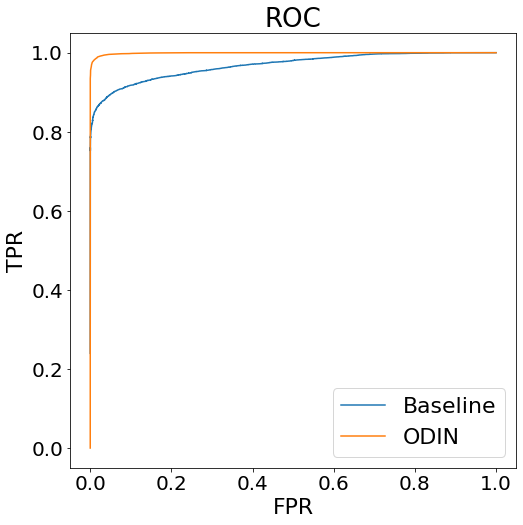

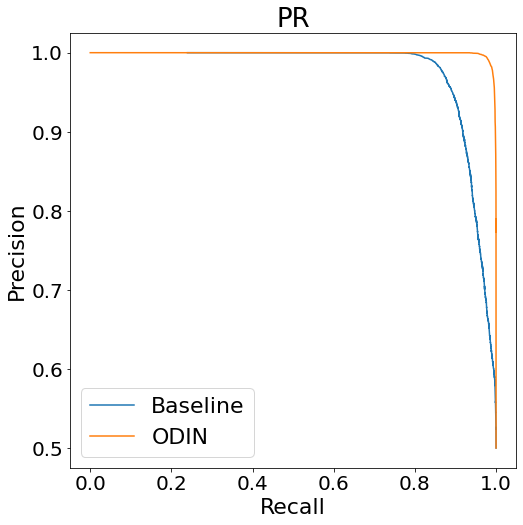

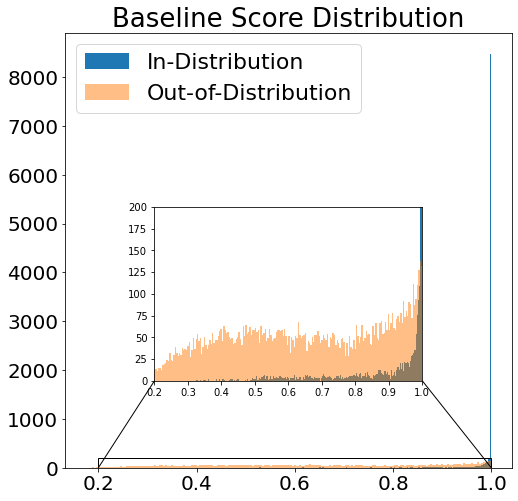

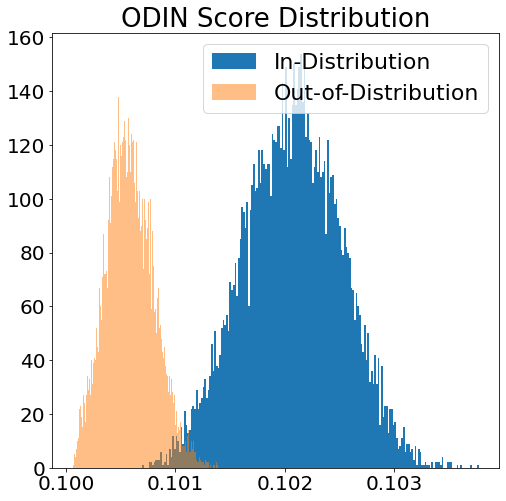

Performance on MNIST:
		AUROC	FPR@95TPR
Baseline	96.8	25.0
ODIN		99.9	0.1


In [15]:
plt.figure(figsize=(8,8))
fig1 = plt.gca()
plt.title("ROC",fontsize=26)
plt.xlabel("FPR",fontsize=22)
plt.ylabel("TPR",fontsize=22)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig2 = plt.gca()
plt.title("PR",fontsize=26)
plt.xlabel("Recall",fontsize=22)
plt.ylabel("Precision",fontsize=22)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig3 = plt.gca()
plt.title("Baseline Score Distribution",fontsize=26)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig4 = plt.gca()
plt.title("ODIN Score Distribution",fontsize=26)
plt.tick_params(labelsize=20)

base_auroc,base_fpr = BaseDet.calculate_metrics()
BaseDet.plot_AUROC(fig1=fig1,fig2=fig2,name=['Baseline','Baseline'])
BaseDet.plot_score_density(fig = fig3)

axin = fig3.inset_axes((0.2, 0.2, 0.6, 0.4))
BaseDet.plot_score_density(fig = axin,legend=False)
axin.set_ylim(0,200)
axin.set_xlim(0.2,1)
mark_inset(fig3, axin, loc1=3, loc2=4, fc="none", ec='k', lw=1)

odin_auroc,odin_fpr = ODINDet.calculate_metrics()
ODINDet.plot_AUROC(fig1=fig1,fig2=fig2,name=['ODIN','ODIN'])
ODINDet.plot_score_density(fig = fig4)
fig1.legend(fontsize=22)
fig2.legend(fontsize=22)

plt.show()
print("Performance on MNIST:")
print("\t\tAUROC\tFPR@95TPR")
print("Baseline\t{:.1f}\t{:.1f}".format(base_auroc*100,base_fpr*100))
print("ODIN\t\t{:.1f}\t{:.1f}".format(odin_auroc*100,odin_fpr*100))

### 5. Uniform Noise

In [20]:
OutDataLoader = get_dataset('Uniform',64,4)
BaseDet = Baseline_Detector(net,InDataLoader,OutDataLoader,device)
ODINDet = ODIN_Detector(net,InDataLoader,OutDataLoader,epsilon=0.0014,T=1000,IPP=True,device=device)

c:\Study\Duke\ECE590\project\src\metrics.py:35: RuntimeWarning: invalid value encountered in long_scalars
  precission=TP/(TP+FP)


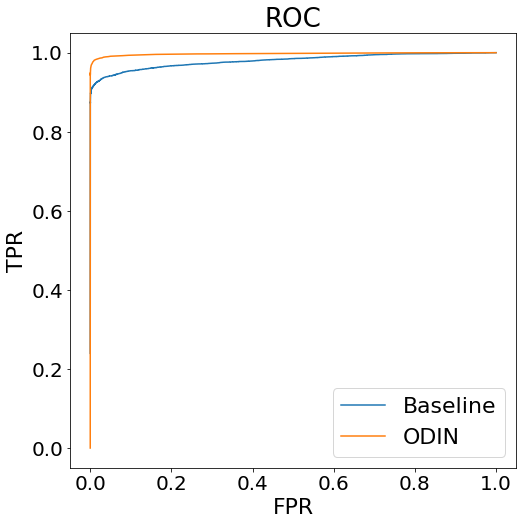

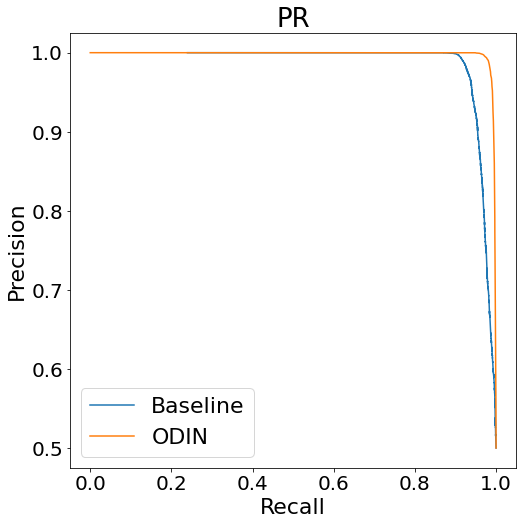

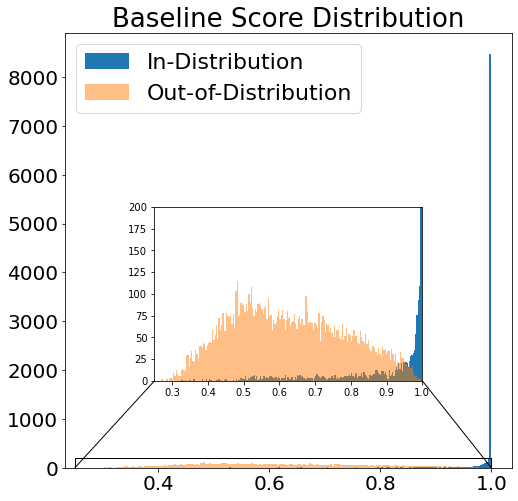

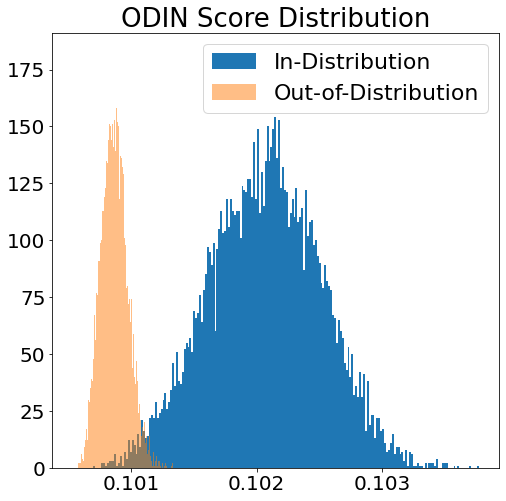

Performance on Uniform Noise:
		AUROC	FPR@95TPR
Baseline	98.0	7.9
ODIN		99.7	0.0


In [21]:
plt.figure(figsize=(8,8))
fig1 = plt.gca()
plt.title("ROC",fontsize=26)
plt.xlabel("FPR",fontsize=22)
plt.ylabel("TPR",fontsize=22)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig2 = plt.gca()
plt.title("PR",fontsize=26)
plt.xlabel("Recall",fontsize=22)
plt.ylabel("Precision",fontsize=22)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig3 = plt.gca()
plt.title("Baseline Score Distribution",fontsize=26)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig4 = plt.gca()
plt.title("ODIN Score Distribution",fontsize=26)
plt.tick_params(labelsize=20)

base_auroc,base_fpr = BaseDet.calculate_metrics()
BaseDet.plot_AUROC(fig1=fig1,fig2=fig2,name=['Baseline','Baseline'])
BaseDet.plot_score_density(fig = fig3)

axin = fig3.inset_axes((0.2, 0.2, 0.6, 0.4))
BaseDet.plot_score_density(fig = axin,legend=False)
axin.set_ylim(0,200)
axin.set_xlim(0.25,1)
mark_inset(fig3, axin, loc1=3, loc2=4, fc="none", ec='k', lw=1)

odin_auroc,odin_fpr = ODINDet.calculate_metrics()
ODINDet.plot_AUROC(fig1=fig1,fig2=fig2,name=['ODIN','ODIN'])
ODINDet.plot_score_density(fig = fig4)
fig1.legend(fontsize=22)
fig2.legend(fontsize=22)

plt.show()
print("Performance on Uniform Noise:")
print("\t\tAUROC\tFPR@95TPR")
print("Baseline\t{:.1f}\t{:.1f}".format(base_auroc*100,base_fpr*100))
print("ODIN\t\t{:.1f}\t{:.1f}".format(odin_auroc*100,odin_fpr*100))

### 6. Gaussian Noise

In [22]:
OutDataLoader = get_dataset('Gaussian',64,4)
BaseDet = Baseline_Detector(net,InDataLoader,OutDataLoader,device)
ODINDet = ODIN_Detector(net,InDataLoader,OutDataLoader,epsilon=0.0014,T=1000,IPP=True,device=device)

c:\Study\Duke\ECE590\project\src\metrics.py:35: RuntimeWarning: invalid value encountered in long_scalars
  precission=TP/(TP+FP)


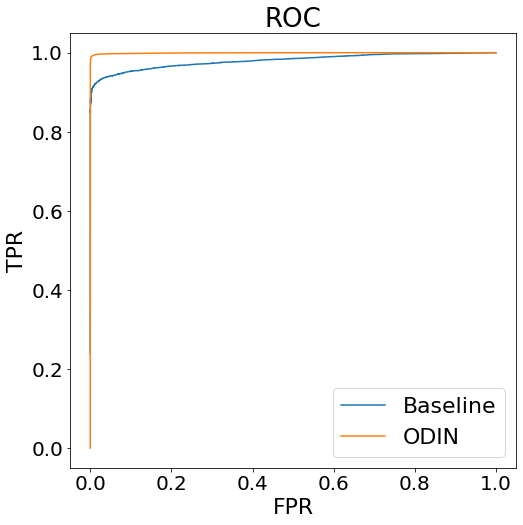

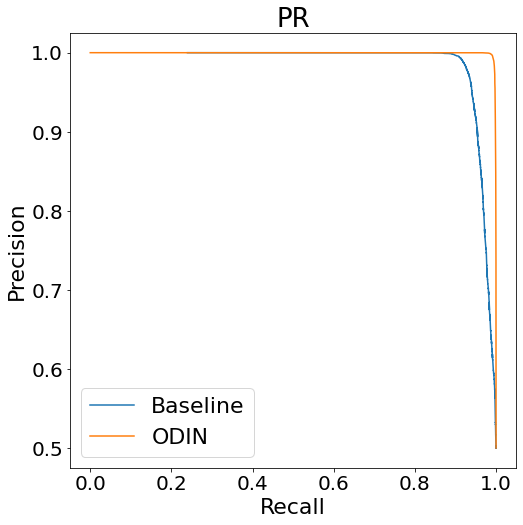

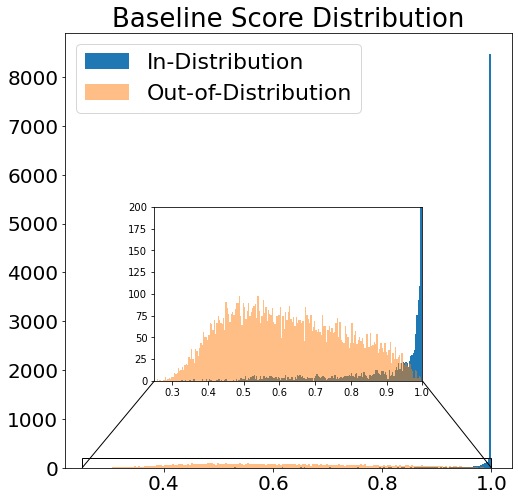

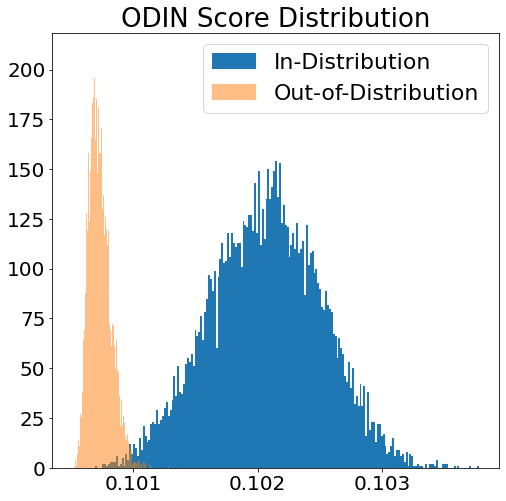

Performance on Gaussian Noise:
		AUROC	FPR@95TPR
Baseline	98.0	8.5
ODIN		99.9	0.0


In [23]:
plt.figure(figsize=(8,8))
fig1 = plt.gca()
plt.title("ROC",fontsize=26)
plt.xlabel("FPR",fontsize=22)
plt.ylabel("TPR",fontsize=22)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig2 = plt.gca()
plt.title("PR",fontsize=26)
plt.xlabel("Recall",fontsize=22)
plt.ylabel("Precision",fontsize=22)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig3 = plt.gca()
plt.title("Baseline Score Distribution",fontsize=26)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig4 = plt.gca()
plt.title("ODIN Score Distribution",fontsize=26)
plt.tick_params(labelsize=20)

base_auroc,base_fpr = BaseDet.calculate_metrics()
BaseDet.plot_AUROC(fig1=fig1,fig2=fig2,name=['Baseline','Baseline'])
BaseDet.plot_score_density(fig = fig3)

axin = fig3.inset_axes((0.2, 0.2, 0.6, 0.4))
BaseDet.plot_score_density(fig = axin,legend=False)
axin.set_ylim(0,200)
axin.set_xlim(0.25,1)
mark_inset(fig3, axin, loc1=3, loc2=4, fc="none", ec='k', lw=1)

odin_auroc,odin_fpr = ODINDet.calculate_metrics()
ODINDet.plot_AUROC(fig1=fig1,fig2=fig2,name=['ODIN','ODIN'])
ODINDet.plot_score_density(fig = fig4)
fig1.legend(fontsize=22)
fig2.legend(fontsize=22)

plt.show()
print("Performance on Gaussian Noise:")
print("\t\tAUROC\tFPR@95TPR")
print("Baseline\t{:.1f}\t{:.1f}".format(base_auroc*100,base_fpr*100))
print("ODIN\t\t{:.1f}\t{:.1f}".format(odin_auroc*100,odin_fpr*100))

## Part 3: Evaluate IPP
1. Compare results with and without IPP

In [15]:
# Use LSUN as out-of-distribution data
OutDataLoader = get_dataset('LSUN',64,4)
# BaseDet = Baseline_Detector(net,InDataLoader,OutDataLoader,device)
ODINDet_IPP = ODIN_Detector(net,InDataLoader,OutDataLoader,epsilon=0.0014,T=1000,IPP=True,device=device)
ODINDet_NOIPP = ODIN_Detector(net,InDataLoader,OutDataLoader,T=1000,IPP=False,device=device)

c:\Study\Duke\ECE590\project\src\metrics.py:35: RuntimeWarning: invalid value encountered in long_scalars
  precission=TP/(TP+FP)
c:\Study\Duke\ECE590\project\src\metrics.py:35: RuntimeWarning: invalid value encountered in long_scalars
  precission=TP/(TP+FP)


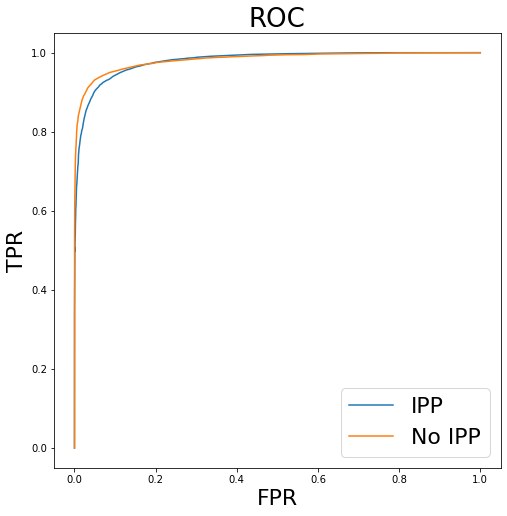

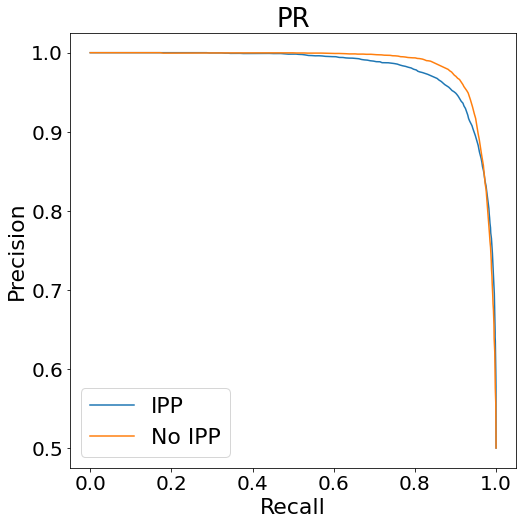

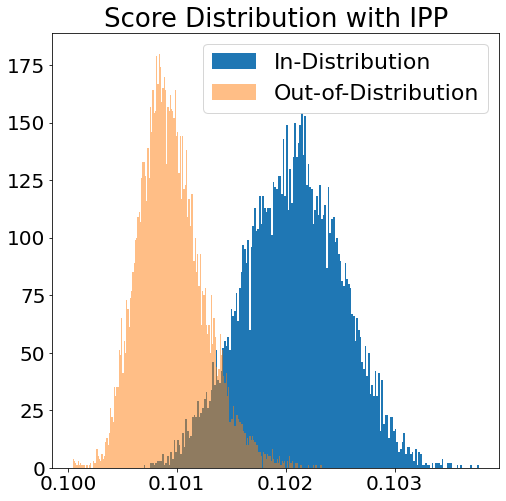

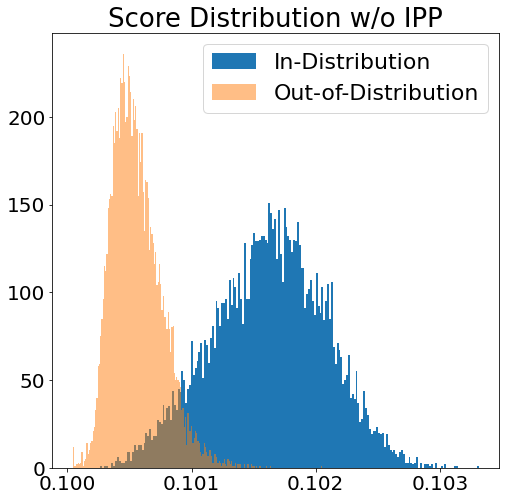

Performance on LSUN:
		AUROC	FPR@95TPR
IPP		97.9	11.3
NO IPP		98.2	8.8


In [16]:
plt.figure(figsize=(8,8))
fig1 = plt.gca()
plt.title("ROC",fontsize=26)
plt.xlabel("FPR",fontsize=22)
plt.ylabel("TPR",fontsize=22)
plt.figure(figsize=(8,8))
plt.tick_params(labelsize=20)
fig2 = plt.gca()
plt.title("PR",fontsize=26)
plt.xlabel("Recall",fontsize=22)
plt.ylabel("Precision",fontsize=22)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig3 = plt.gca()
plt.title("Score Distribution with IPP",fontsize=26)
plt.tick_params(labelsize=20)
plt.figure(figsize=(8,8))
fig4 = plt.gca()
plt.title("Score Distribution w/o IPP",fontsize=26)
plt.tick_params(labelsize=20)

ipp_auroc,ipp_fpr = ODINDet_IPP.calculate_metrics()
ODINDet_IPP.plot_AUROC(fig1=fig1,fig2=fig2,name=['IPP','IPP'])
ODINDet_IPP.plot_score_density(fig = fig3)

noipp_auroc,noipp_fpr = ODINDet_NOIPP.calculate_metrics()
ODINDet_NOIPP.plot_AUROC(fig1=fig1,fig2=fig2,name=['No IPP','No IPP'])
ODINDet_NOIPP.plot_score_density(fig = fig4)
fig1.legend(fontsize=22)
fig2.legend(fontsize=22)

plt.show()
print("Performance on LSUN:")
print("\t\tAUROC\tFPR@95TPR")
print("IPP\t\t{:.1f}\t{:.1f}".format(ipp_auroc*100,ipp_fpr*100))
print("NO IPP\t\t{:.1f}\t{:.1f}".format(noipp_auroc*100,noipp_fpr*100))

2. Use different epsilon for IPP

In [4]:
import numpy as np
from tqdm import tqdm
dataset = ['SVHN','LSUN','LSUN_resize','MNIST','Uniform','Gaussian']
auroc_sum,fpr_sum=[],[]
for d in dataset:
    print("Using "+d)
    OutDataLoader = get_dataset(d,64,4)
    auroc_ls,fpr_ls=[],[]
    for epsilon in tqdm(np.linspace(0,0.004,21)):
        ODINDet=ODIN_Detector(net,InDataLoader,OutDataLoader,epsilon=epsilon,T=1000,IPP=True,device=device)
        auroc,fpr=ODINDet.calculate_metrics()
        auroc_ls.append(auroc)
        fpr_ls.append(fpr)
    auroc_sum.append(auroc_ls)
    fpr_sum.append(fpr_ls)

Using SVHN
Using downloaded and verified file: ./data/SVHN\test_32x32.mat
  0%|          | 0/21 [00:00<?, ?it/s]c:\Study\Duke\ECE590\project\src\metrics.py:35: RuntimeWarning: invalid value encountered in long_scalars
  precission=TP/(TP+FP)
100%|██████████| 21/21 [15:42<00:00, 44.90s/it]


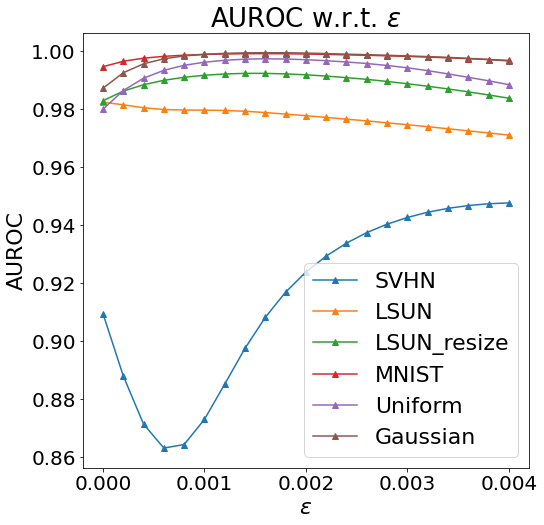

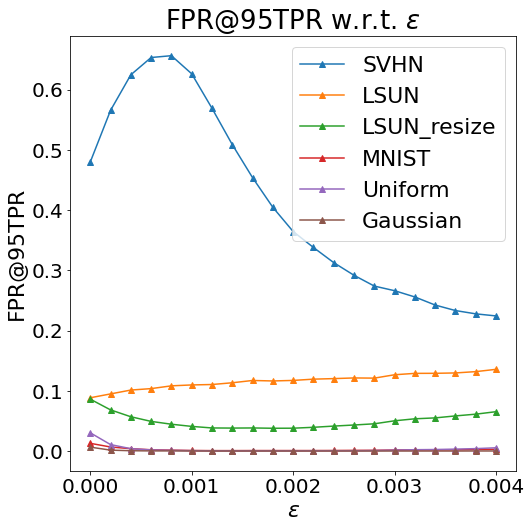

In [25]:
plt.figure(figsize=(8,8))
plt.title("AUROC w.r.t. $\epsilon$",fontsize=26)
plt.xlabel("$\epsilon$",fontsize=22)
plt.ylabel("AUROC",fontsize=22)
plt.tick_params(labelsize=20)
for i,d in enumerate(dataset):
    plt.plot(np.linspace(0,0.004,21),auroc_sum[i],'-^',label=d)
plt.legend(fontsize=22)

plt.figure(figsize=(8,8))
plt.title("FPR@95TPR w.r.t. $\epsilon$",fontsize=26)
plt.xlabel("$\epsilon$",fontsize=22)
plt.ylabel("FPR@95TPR",fontsize=22)
plt.tick_params(labelsize=20)
for i,d in enumerate(dataset):
    plt.plot(np.linspace(0,0.004,21),fpr_sum[i],'-^',label=d)
plt.legend(fontsize=22)

plt.show()

## Part 4: Try other architectures
Repeat the blocks above to try WideResNet and Resnet20.